<h1><center> KNN MODEL



In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving mypersonality_cleaned.csv to mypersonality_cleaned.csv


In [ ]:
status_data = pd.read_csv("mypersonality_cleaned.csv")
status_data.head()

,Unnamed: 0,#AUTHID,STATUS,sentiNEG,sentiPOS,sentiNEU,sentiCOMPOUND,sEXT,sNEU,sAGR,...,cCON,cOPN,DATE,NETWORKSIZE,BETWEENNESS,NBETWEENNESS,DENSITY,BROKERAGE,NBROKERAGE,TRANSITIVITY
0,0,b7b7764cfa1c523e4e93ab2a79a946c4,likes the sound of thunder.,0.000,0.412,0.588,0.4215,2.65,3.0,3.15,...,n,y,06/19/09 03:21 PM,180.0,14861.6,93.29,0.03,15661.0,0.49,0.1
1,1,b7b7764cfa1c523e4e93ab2a79a946c4,is so sleepy it's not even funny that's she ca...,0.167,0.000,0.833,-0.3412,2.65,3.0,3.15,...,n,y,07/02/09 08:41 AM,180.0,14861.6,93.29,0.03,15661.0,0.49,0.1
2,2,b7b7764cfa1c523e4e93ab2a79a946c4,is sore and wants the knot of muscles at the b...,0.195,0.278,0.527,0.6280,2.65,3.0,3.15,...,n,y,06/15/09 01:15 PM,180.0,14861.6,93.29,0.03,15661.0,0.49,0.1
3,3,b7b7764cfa1c523e4e93ab2a79a946c4,likes how the day sounds in this new song.,0.000,0.259,0.741,0.4215,2.65,3.0,3.15,...,n,y,06/22/09 04:48 AM,180.0,14861.6,93.29,0.03,15661.0,0.49,0.1
4,4,b7b7764cfa1c523e4e93ab2a79a946c4,is home. <3,0.000,0.592,0.408,0.4404,2.65,3.0,3.15,...,n,y,07/20/09 02:31 AM,180.0,14861.6,93.29,0.03,15661.0,0.49,0.1


In [ ]:
p = []
r = []
a = []
f= []
b = []

def summarize_metrics(tp, tn, fp, fn):
    precision = tp / (tp + fp)
    recall = tp / (tp + fn)
    accuracy = (tp + tn) / (tp + tn + fp + fn)
    f1_score = (2 * recall * precision) / (recall + precision)
    balanced_accuracy = ((tp/(tp+fn)) + (tn/(tn+fp))) / 2

    p.append(precision)
    r.append(recall)
    a.append(accuracy)
    f.append(f1_score)
    b.append(balanced_accuracy)
    print("Balanced accuracy: ",balanced_accuracy)
    print("Precison:", precision)
    print("Recall:", recall)
    print("Accuracy:", accuracy)
    print("F1 score:", f1_score)

    return p,r,a,f

In [ ]:
status_data = status_data.dropna()

In [ ]:
 status_data = status_data.drop(['STATUS', '#AUTHID', 'sEXT', 'sNEU', 'sAGR',
                                    'sCON', 'sOPN', 'DATE'], axis=1)

In [ ]:
 status_data = status_data.drop(['BROKERAGE', 'BETWEENNESS', 'NBROKERAGE',
                                    'NBETWEENNESS', 'DENSITY', 'TRANSITIVITY', 'NETWORKSIZE'], axis=1)


In [ ]:
new_columns = status_data.columns.values
new_columns[0] = "rowID"
status_data.columns = new_columns

In [ ]:
cols = status_data.columns.tolist()
cols = cols[:5] + cols[5:10]
status_data = status_data[cols]

In [ ]:
features = ['cEXT', 'cNEU', 'cOPN', 'cAGR', 'cCON']
for feature in features:
  status_data[feature] = status_data[feature].map({'y': 1.0, 'n': 0.0}).astype(int)

In [ ]:
from sklearn.model_selection import train_test_split

train_data, test_data = train_test_split(status_data, test_size=0.50,random_state=42)


In [ ]:
train = train_data.values
test = test_data.values

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=250)
model = model.fit(train[0:, 1:5], train[0:, 7])

In [ ]:
output = model.predict(test[:, 1:5])
rowID = [TEST.rowID for TEST in test_data.itertuples()]
result_df = pd.DataFrame({"rowID": rowID,
                                  "cOPN": list(output)})

In [ ]:
 # Build the confusion matrix to assess the model
tp_count = 0
tn_count = 0
fp_count = 0
fn_count = 0
for row in rowID:
  test_cEXT_val = int(test_data.loc[test_data['rowID'] == row].cOPN)
  result_cEXT_val = int(result_df.loc[result_df['rowID'] == row].cOPN)
  if test_cEXT_val == 1:
    if result_cEXT_val == 1:
        tp_count += 1
    else:
        fn_count += 1
  else:
    if result_cEXT_val == 1:
        fp_count += 1
    else:
        tn_count += 1


3327 119 1113 399


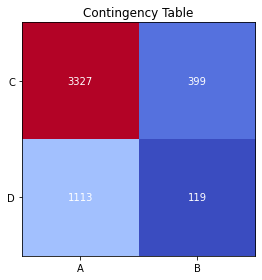

In [ ]:
print(tp_count, tn_count, fp_count, fn_count)


data = np.array([[tp_count, fn_count ], [fp_count, tn_count ]])

fig, ax = plt.subplots()
im = ax.imshow(data, cmap='coolwarm')

ax.set_xticks(np.arange(len(['A', 'B'])))
ax.set_yticks(np.arange(len(['C', 'D'])))

ax.set_xticklabels(['A', 'B'])
ax.set_yticklabels(['C', 'D'])

for i in range(len(['A', 'B'])):
    for j in range(len(['C', 'D'])):
        text = ax.text(j, i, data[i, j],
                       ha="center", va="center", color="w")

ax.set_title("Contingency Table")
fig.tight_layout()
plt.show()

In [ ]:

#after adding random state
summarize_metrics(tp_count, tn_count, fp_count, fn_count)

Balanced accuracy:  0.494752781437564
Precison: 0.7493243243243243
Recall: 0.892914653784219
Accuracy: 0.6950383219039935
F1 score: 0.8148420279206465


([0.7493243243243243],
 [0.892914653784219],
 [0.6950383219039935],
 [0.8148420279206465])

In [ ]:
#visualizing Social metrics at different test size and sample size

test_size = [0.1,0.15,0.2,0.25,0.3,0.35,0.4,0.45,0.5,0.55,0.6,0.65,0.7,0.75,0.8,0.85,0.9,0.95]

for i in test_size :
    train_data, test_data = train_test_split(status_data, test_size=i,random_state=42)
    train = train_data.values
    test = test_data.values
    Kmodel =KNeighborsClassifier(n_neighbors=250)
    model = Kmodel.fit(train[0:,1:5],train[0:,7])
    output = model.predict(test[:, 1:5])
    rowID = [TEST.rowID for TEST in test_data.itertuples()]
    result_df = pd.DataFrame({"rowID": rowID,
                                  "cOPN": list(output)})
    tp_count = 0
    tn_count = 0
    fp_count = 0
    fn_count = 0
    for row in rowID:
      test_cEXT_val = int(test_data.loc[test_data['rowID'] == row].cOPN)
      result_cEXT_val = int(result_df.loc[result_df['rowID'] == row].cOPN)
      if test_cEXT_val == 1:
        if result_cEXT_val == 1:
            tp_count += 1
        else:
            fn_count += 1
      else:
        if result_cEXT_val == 1:
            fp_count += 1
        else:
            tn_count += 1

    x = summarize_metrics(tp_count, tn_count, fp_count, fn_count)


Balanced accuracy:  0.48741869222868883
Precison: 0.7630057803468208
Recall: 0.8661417322834646
Accuracy: 0.6905241935483871
F1 score: 0.8113091579594345
Balanced accuracy:  0.49980681927943593
Precison: 0.7599502487562189
Recall: 0.5402298850574713
Accuracy: 0.5208333333333334
F1 score: 0.6315245478036177
Balanced accuracy:  0.49923180360843933
Precison: 0.7585568917668826
Recall: 0.5444887118193891
Accuracy: 0.5226814516129032
F1 score: 0.6339389253962118
Balanced accuracy:  0.501440738273457
Precison: 0.7537091988130564
Recall: 0.5444801714898178
Accuracy: 0.5231948366276724
F1 score: 0.6322339763534537
Balanced accuracy:  0.5032283955199813
Precison: 0.7557856272838003
Recall: 0.5535236396074933
Accuracy: 0.5287394957983194
F1 score: 0.6390319258496395
Balanced accuracy:  0.49622492401215806
Precison: 0.7546798029556651
Recall: 0.8754285714285714
Accuracy: 0.6905790838375108
F1 score: 0.8105820105820106
Balanced accuracy:  0.4957233712512927
Precison: 0.7544655514601645
Recall: 0.8

In [ ]:
#value deleter
p.pop(0)
r.pop(0)
a.pop(0)
f.pop(0)
b.pop(0)

0.494752781437564

In [ ]:
print(b)
print(len(b))

[0.48741869222868883, 0.49980681927943593, 0.49923180360843933, 0.501440738273457, 0.5032283955199813, 0.49622492401215806, 0.4957233712512927, 0.49189704275053986, 0.494752781437564, 0.49772983574405494, 0.5018474704988901, 0.5015179316096747, 0.5020518985990331, 0.49851578381049044, 0.4939203230213388, 0.4941105130984228, 0.49402891581336994, 0.5]
18


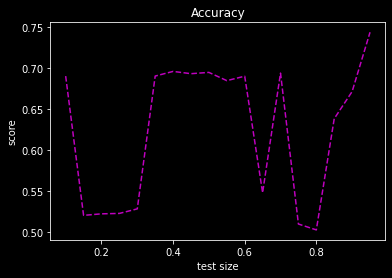

In [ ]:
import matplotlib.pyplot as plt


plt.style.use("dark_background")
plt.xlabel("test size")
plt.ylabel("score")
plt.title("Accuracy")
plt.plot(test_size,a,'m--')

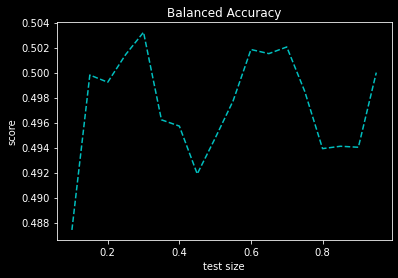

In [ ]:


plt.style.use("dark_background")
plt.xlabel("test size")
plt.ylabel("score")
plt.title("Balanced Accuracy")
plt.plot(test_size,b,'c--')

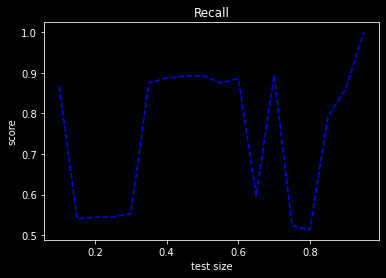

In [ ]:
plt.style.use("dark_background")
plt.xlabel("test size")
plt.ylabel("score")
plt.title("Recall")
plt.plot(test_size,r,'b--')

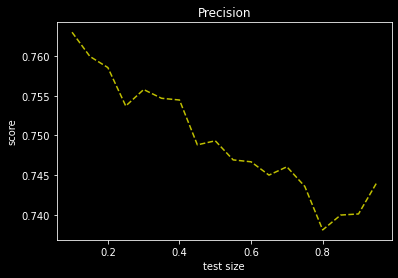

In [ ]:
plt.style.use("dark_background")
plt.xlabel("test size")
plt.ylabel("score")
plt.title("Precision")
plt.plot(test_size,p,'y--')

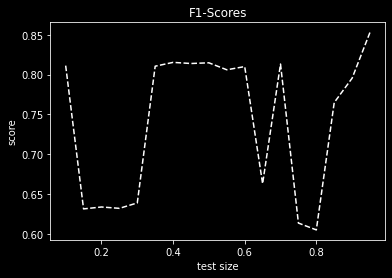

In [ ]:
plt.style.use("dark_background")
plt.xlabel("test size")
plt.ylabel("score")
plt.title("F1-Scores")
plt.plot(test_size,f,'w--')